# **OIBSIP - Data Science**
# **TASK 2 : Unemployment Analysis With Python**
**By - Suryansh Bajpayi**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Unemployment_Rate_upto_11_2020.csv') #Read dataset
df.sample(5)  #fetch five sample of dataset

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
248,Uttarakhand,29-02-2020,M,4.99,3020931,36.48,North,30.0668,79.0193
18,Assam,30-09-2020,M,1.19,14107641,54.38,Northeast,26.2006,92.9376
110,Karnataka,29-02-2020,M,3.61,21677719,40.54,South,15.3173,75.7139
259,West Bengal,31-03-2020,M,6.92,35903917,47.27,East,22.9868,87.8550
225,Telangana,30-09-2020,M,3.27,16961448,54.94,South,18.1124,79.0193


In [ ]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
df[' Frequency'].value_counts()

 M    267
Name:  Frequency, dtype: int64

In [ ]:
print(df['Region'].value_counts())

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: Region, dtype: int64


In [ ]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info() #Prints info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
y=df[' Estimated Unemployment Rate (%)']

In [ ]:
y

0       5.48
1       5.83
2       5.79
3      20.51
4      17.43
       ...  
262     7.29
263     6.83
264    14.87
265     9.35
266     9.98
Name:  Estimated Unemployment Rate (%), Length: 267, dtype: float64

In [ ]:
df[["day", "month", "year"]] = df[' Date'].str.split("-", expand = True)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,day,month,year
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740,31,01,2020
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740,29,02,2020
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740,31,03,2020
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740,30,04,2020
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740,31,05,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855,30,06,2020
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855,31,07,2020
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855,31,08,2020
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855,30,09,2020


In [ ]:
df.drop(columns=[' Frequency'],axis=1,inplace=True)

In [ ]:
df[:5]

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,day,month,year
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,15.9129,79.74,31,01,2020
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,15.9129,79.74,29,02,2020
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South,15.9129,79.74,31,03,2020
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South,15.9129,79.74,30,04,2020
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South,15.9129,79.74,31,05,2020


**Analyzing Data by bar graphs**

In [ ]:
fg=px.bar(df,x='Region',y=' Estimated Unemployment Rate (%)',color='Region',
          title='Unemployment Rate (State-Wise) by bar Graph',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

In [ ]:
fg=px.bar(df,x='Region.1',y=' Estimated Unemployment Rate (%)',color='Region',
          title='Unemployment Rate (Region-Wise) by Bar Graph',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

In [ ]:
fg=px.box(df,x='Region',y=' Estimated Unemployment Rate (%)',color='Region',
          title='Unemployment Rate (State-Wise) by box Graph',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

<ipython-input-25-0ece6b0322b2>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



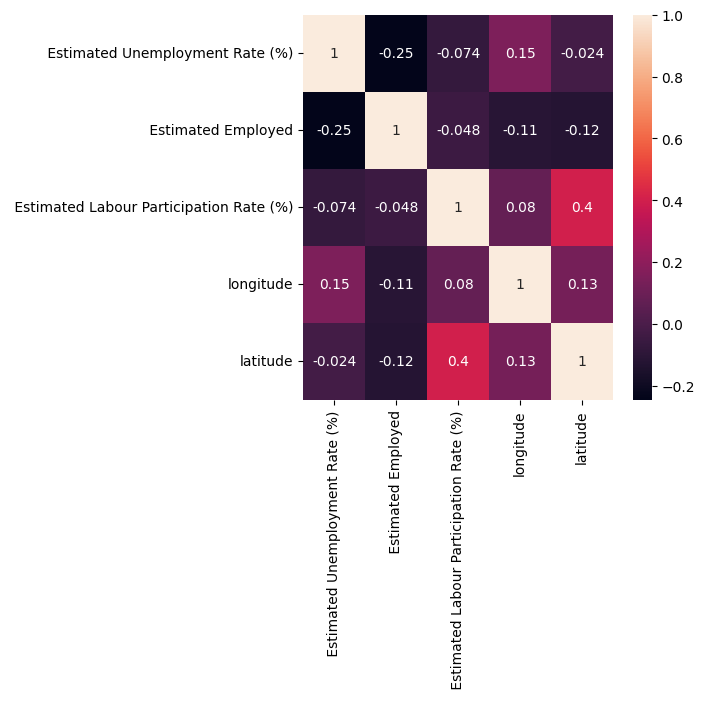

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
fg=px.histogram(df,x='Region',y=' Estimated Unemployment Rate (%)',color='Region',
          title='Unemployment Rate (State-Wise) by Histogram',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

In [ ]:
df.columns

Index(['Region', ' Date', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
df.month.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10'],
      dtype=object)

<Axes: xlabel='month', ylabel=' Estimated Unemployment Rate (%)'>

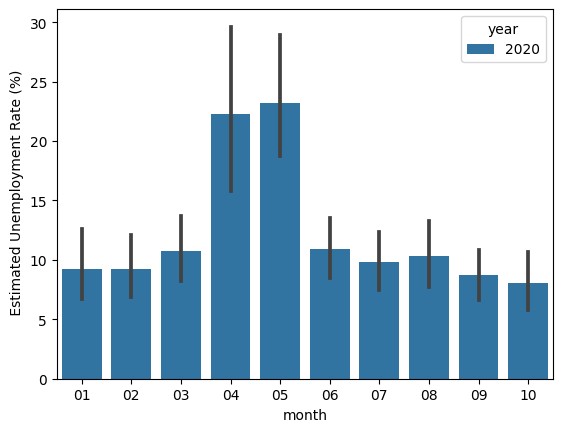

In [ ]:
sns.barplot(x='month',y=' Estimated Unemployment Rate (%)',hue='year',data=df)

In [ ]:
df.day.unique()

array([' 31', ' 29', ' 30'], dtype=object)

<Axes: xlabel='day', ylabel=' Estimated Unemployment Rate (%)'>

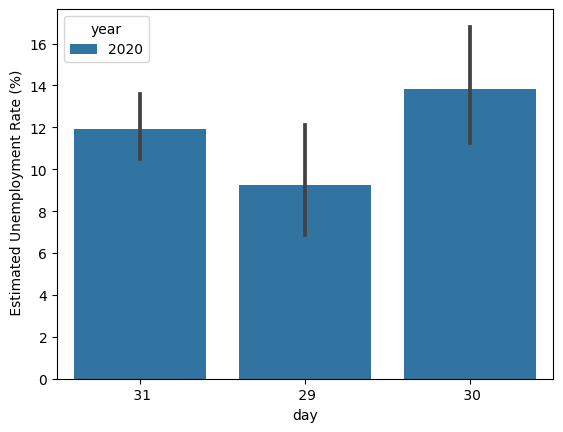

In [ ]:
sns.barplot(x='day',y=' Estimated Unemployment Rate (%)',hue='year',data=df)

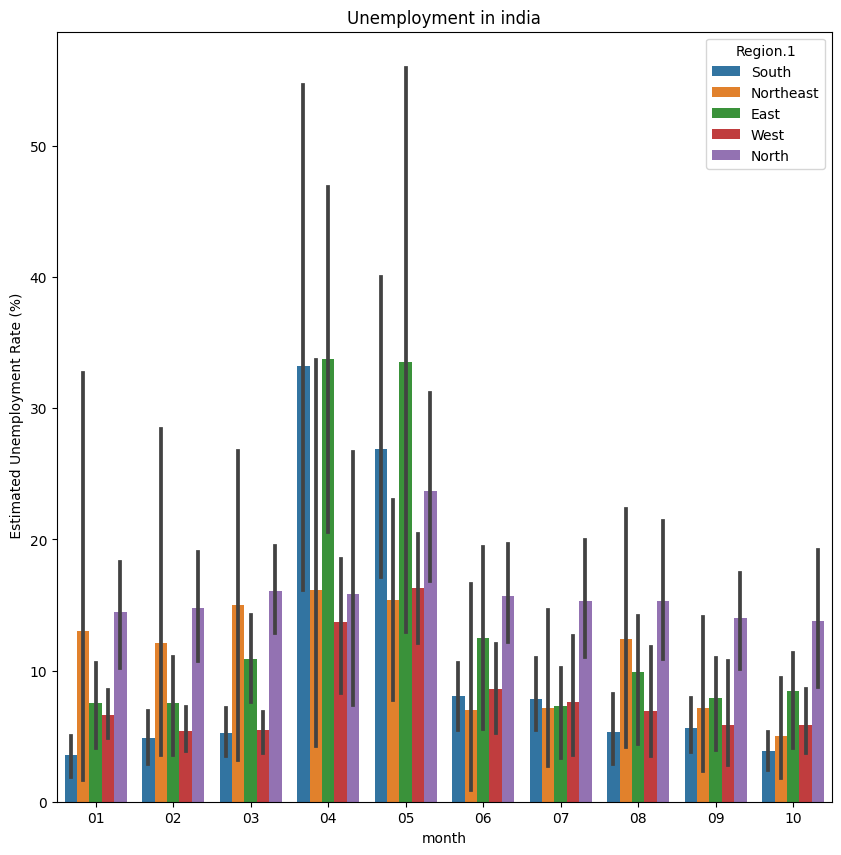

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Unemployment in india")
sns.barplot(x='month',y =' Estimated Unemployment Rate (%)',hue='Region.1', data=df)
plt.show()

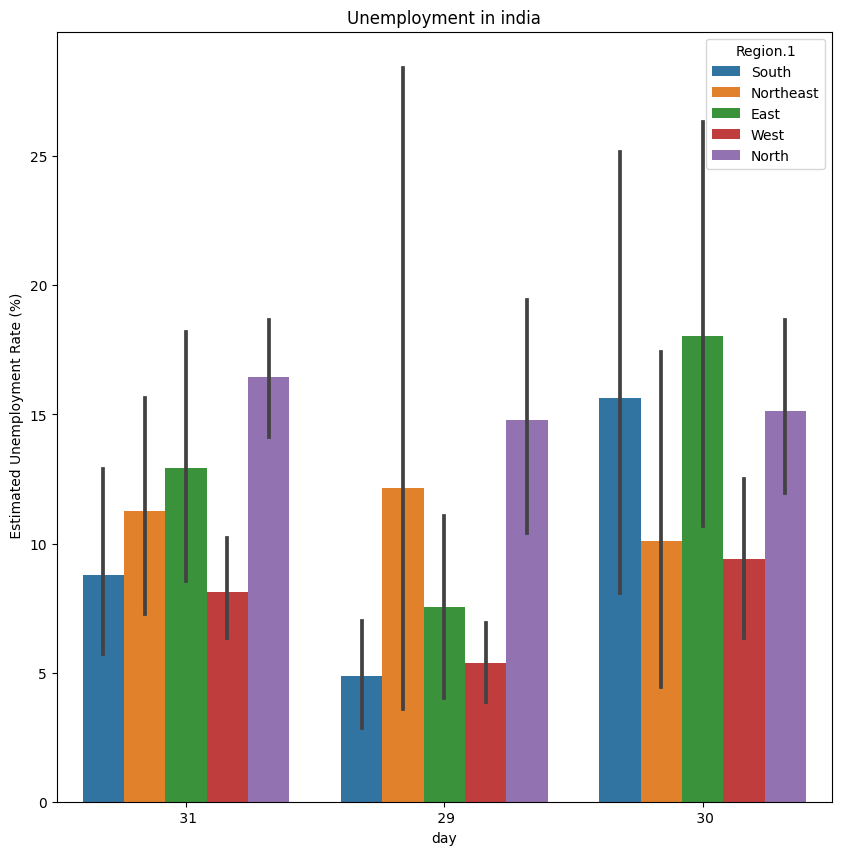

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Unemployment in india")
sns.barplot(x='day',y =' Estimated Unemployment Rate (%)',hue='Region.1', data=df)
plt.show()

In [ ]:
unemploment = df[["Region",' Estimated Unemployment Rate (%)']]
figure = px.sunburst(unemploment, path=["Region"],
                     values=' Estimated Unemployment Rate (%)',
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Unemployment Rate in India")
figure.show()

In [ ]:
df.columns

Index(['Region', ' Date', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
unemploment = df[["Region.1",' Estimated Employed']]
figure = px.sunburst(unemploment, path=["Region.1"],
                     values=' Estimated Employed',
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="employment Rate in India")
figure.show()